In [1]:
from google.colab import files
uploaded = files.upload()

Saving player_data.csv to player_data.csv
Saving Players.csv to Players.csv
Saving Seasons_Stats.csv to Seasons_Stats.csv


In [2]:
import pandas as pd
player_data = pd.read_csv("player_data.csv")
players = pd.read_csv("Players.csv")
season_stats = pd.read_csv("Seasons_Stats.csv")

#Player Data => Position and Avg Weight




In [6]:
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [8]:
player_data.describe(include="all")

,name,year_start,year_end,position,height,weight,birth_date,college
count,4550,4550.000000,4550.000000,4549,4549,4544.000000,4519,4248
unique,4500,NaN,NaN,7,28,NaN,4161,473
top,Charles Jones,NaN,NaN,G,6-7,NaN,"August 31, 1952",University of Kentucky
freq,3,NaN,NaN,1574,473,NaN,3,99
mean,NaN,1985.076264,1989.272527,NaN,NaN,208.908011,NaN,NaN
std,NaN,20.974188,21.874761,NaN,NaN,26.268662,NaN,NaN
min,NaN,1947.000000,1947.000000,NaN,NaN,114.000000,NaN,NaN
25%,NaN,1969.000000,1973.000000,NaN,NaN,190.000000,NaN,NaN
50%,NaN,1986.000000,1992.000000,NaN,NaN,210.000000,NaN,NaN
75%,NaN,2003.000000,2009.000000,NaN,NaN,225.000000,NaN,NaN


In [10]:
player_data.isna().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

In [41]:
player_data = player_data.dropna()
players_per_position = player_data.groupby("position")["weight"].mean()
players_per_position.to_frame()

,weight
position,
C,242.219212
C-F,228.256158
F,217.985857
F-C,222.919444
F-G,202.604878
G,186.828115
G-F,197.017857


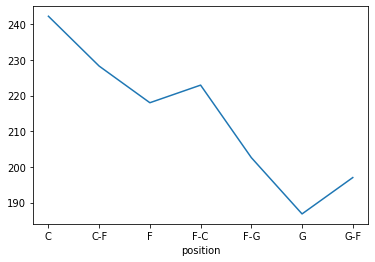

In [29]:
players_per_position.plot()

#Player College and Average Height

In [30]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [31]:
players.describe(include="all")

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
count,3922.000000,3921,3921.000000,3921.000000,3573,3921.00000,3452,3439
unique,NaN,3921,NaN,NaN,422,NaN,1264,128
top,NaN,Drew Barry,NaN,NaN,University of Kentucky,NaN,Chicago,California
freq,NaN,1,NaN,NaN,89,NaN,114,344
mean,1960.500000,NaN,198.704922,94.783219,NaN,1962.37975,NaN,NaN
std,1132.328206,NaN,9.269761,12.039515,NaN,20.33491,NaN,NaN
min,0.000000,NaN,160.000000,60.000000,NaN,1913.00000,NaN,NaN
25%,980.250000,NaN,190.000000,86.000000,NaN,1948.00000,NaN,NaN
50%,1960.500000,NaN,198.000000,95.000000,NaN,1964.00000,NaN,NaN
75%,2940.750000,NaN,206.000000,102.000000,NaN,1979.00000,NaN,NaN


In [32]:
players.isna().sum()

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [44]:
#Take out the one NaN Player
players = players.dropna(subset=["Player", "collage"])
players.isna().sum()

Unnamed: 0       0
Player           0
height           0
weight           0
collage          0
born             0
birth_city     376
birth_state    384
dtype: int64

In [50]:
avg_height_per_college = players.groupby("collage")["height"].mean()
avg_height_per_college = avg_height_per_college.to_frame()
avg_height_per_college

,height
collage,
Acadia University,188.000000
Alabama A&M University,211.000000
Alabama State University,198.000000
Albany State University,207.250000
Alcorn State University,200.000000
...,...
Wright State University,205.500000
Xavier University,198.312500
Xavier University of Louisiana,195.333333


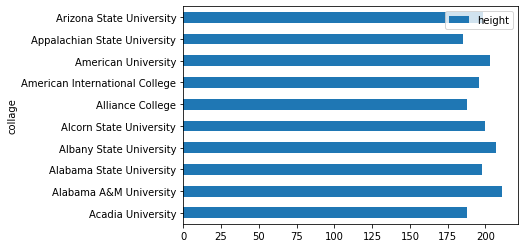

In [55]:
#Look at first 10 rows of college and avg heigh visualization
avg_height_per_college.head(n=10).plot.barh()